In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [79]:
eda_df=pd.read_csv('Loan_default_with_categories.csv')
eda_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,LoanPurpose,HasCoSigner,Default,CS_Cat,DTIR_Cat,Income_Cat,IR_Cat,LA_Cat,Loan_to_Income_Ratio,DTI_per_Line
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Other,1,0,Poor,0.4-0.5,75K-90K,15-20,50K-75K,0.5883,0.1100
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Other,1,0,Poor,0.6-0.7,45K-60K,<=5,100K-125K,2.4675,0.6793
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Auto,0,1,Poor,0.3-0.4,75K-90K,20-25,125K-150K,1.5342,0.1033
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Business,0,0,Very Good,0.2-0.3,30K-45K,5-10,25K-50K,1.4126,0.0766
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Auto,0,0,Fair,0.7-0.8,15K-30K,5-10,<=25K,0.4472,0.1825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,...,Other,0,0,Poor,0.8-0.9,30K-45K,10-15,200K-225K,5.5473,0.2124
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,...,Home,0,1,Poor,0.2-0.3,45K-60K,10-15,175K-200K,3.6552,0.1049
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,...,Auto,1,0,Fair,0.4-0.5,75K-90K,5-10,200K-225K,2.4557,0.1666
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,...,Other,0,0,Excellent,0.4-0.5,75K-90K,20-25,50K-75K,0.7117,0.4396


#### Creating a Composite Risk Score

In [80]:
from sklearn.preprocessing import MinMaxScaler

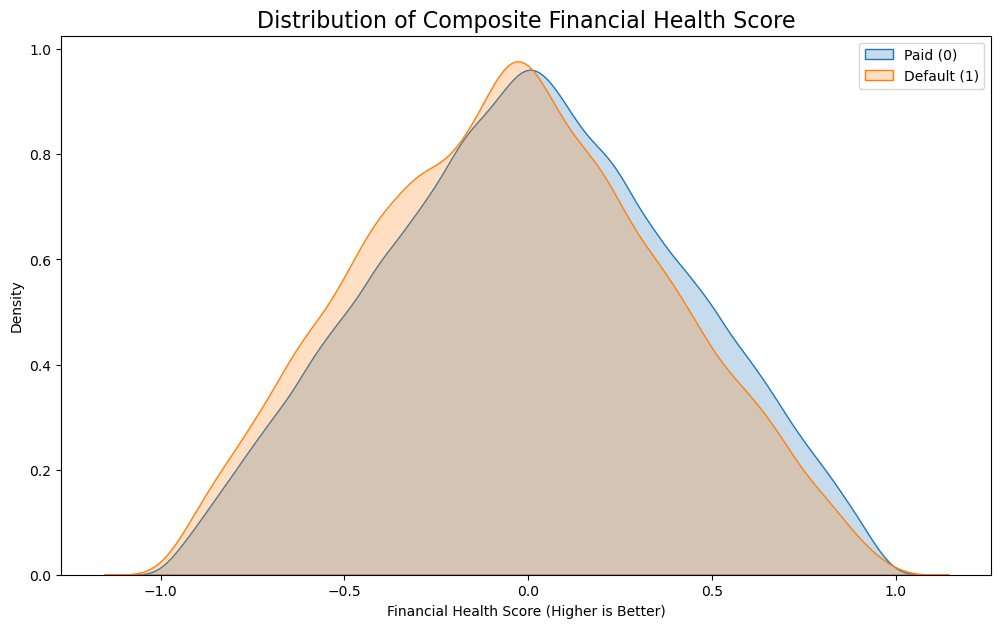

In [81]:
# Scale CreditScore and DTIRatio btw 0 and 1
slr=MinMaxScaler()
eda_df['CS_scaled']=(slr.fit_transform(eda_df[['CreditScore']])).round(4)
eda_df['DTIR_scaled']=slr.fit_transform(eda_df[['DTIRatio']]).round(4)

eda_df['Financial_Health_Score']=(eda_df['CS_scaled']-eda_df['DTIR_scaled']).round(4)

plt.figure(figsize=(12, 7))
sns.kdeplot(eda_df[eda_df['Default']==0]['Financial_Health_Score'],label='Paid (0)',fill=True)
sns.kdeplot(eda_df[eda_df['Default']==1]['Financial_Health_Score'],label='Default (1)',fill=True)

plt.title('Distribution of Composite Financial Health Score',fontsize=16)
plt.xlabel('Financial Health Score (Higher is Better)')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Multivariate Analysis with Facet Grids

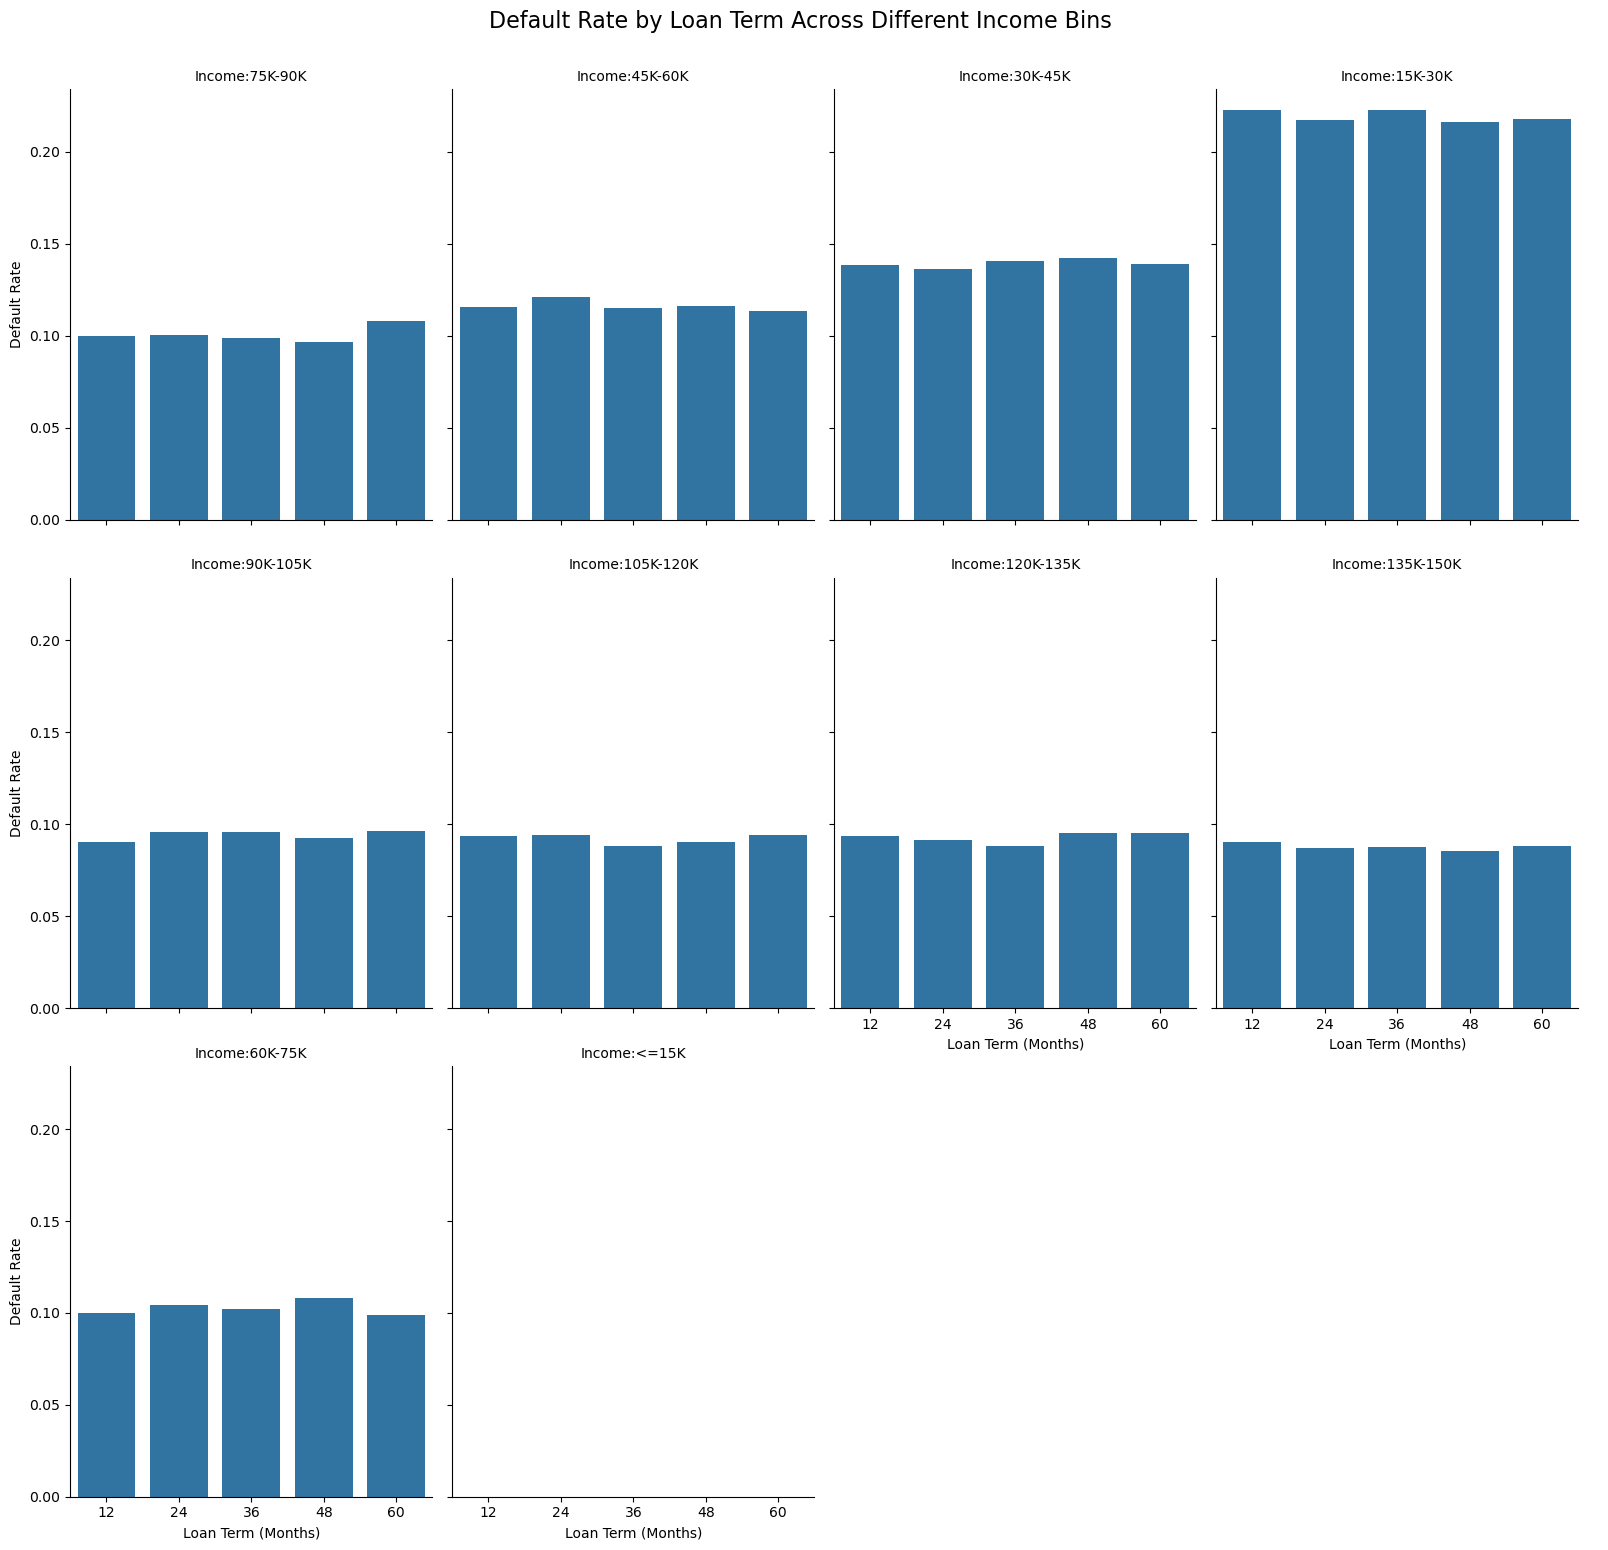

In [82]:
g = sns.catplot(x='LoanTerm',y='Default',col=eda_df['Income_Cat'],
                data=eda_df,kind='bar',height=5,aspect=0.8,
                col_wrap=4,errorbar=None)

g.fig.suptitle('Default Rate by Loan Term Across Different Income Bins',y=1.03,fontsize=16)
g.set_axis_labels("Loan Term (Months)","Default Rate")
g.set_titles("Income:{col_name}")
plt.show()

#### Analyzing Life Events and Financial Decisions

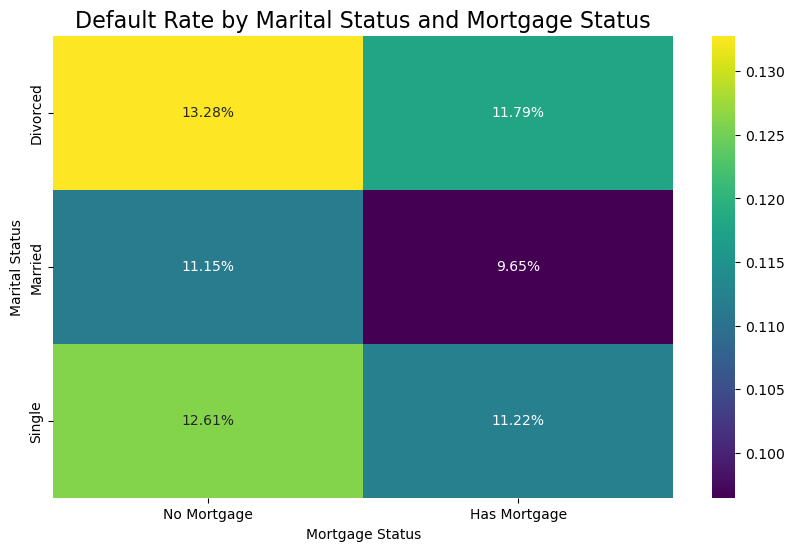

In [83]:
pivot_life=eda_df.pivot_table(values='Default', 
                             index='MaritalStatus', 
                             columns='HasMortgage', 
                             aggfunc='mean')

pivot_life.columns=['No Mortgage','Has Mortgage']

plt.figure(figsize=(10,6))
sns.heatmap(pivot_life,annot=True,cmap="viridis",fmt=".2%")
plt.title('Default Rate by Marital Status and Mortgage Status',fontsize=16)
plt.xlabel('Mortgage Status')
plt.ylabel('Marital Status')
plt.show()

#### Profitability vs. Risk Analysis

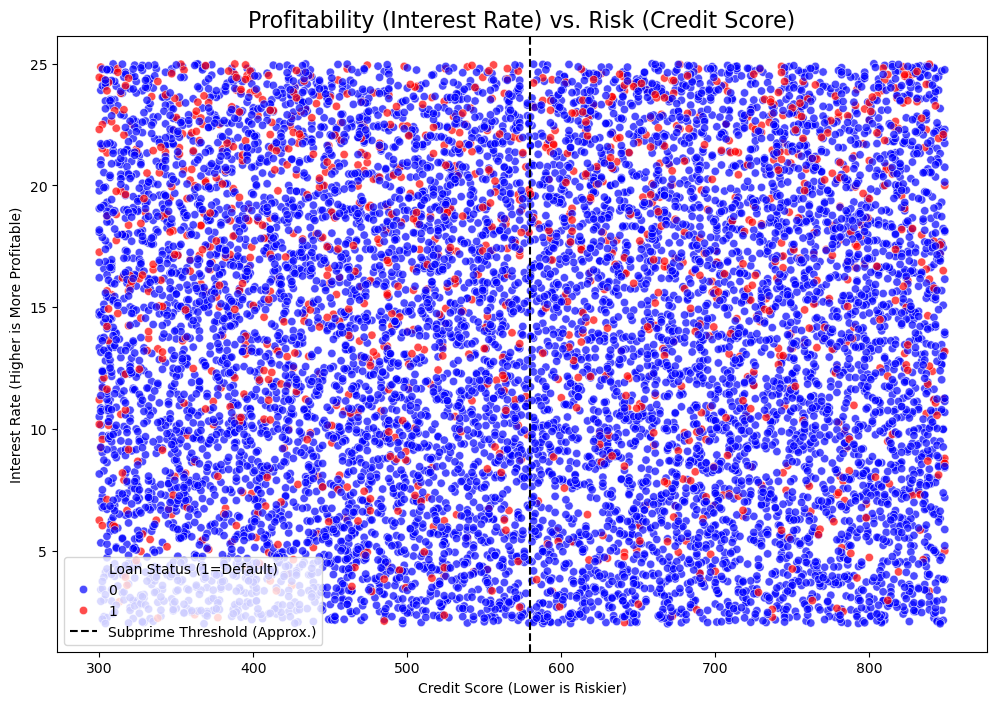

In [84]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=eda_df.sample(10000), # Use a sample for cleaner visualization
                x='CreditScore', 
                y='InterestRate', 
                hue='Default',
                alpha=0.7, 
                palette={0:'blue', 1:'red'})

plt.title('Profitability (Interest Rate) vs. Risk (Credit Score)',fontsize=16)
plt.xlabel('Credit Score (Lower is Riskier)')
plt.ylabel('Interest Rate (Higher is More Profitable)')
plt.axvline(x=580,color='black',linestyle='--',label='Subprime Threshold (Approx.)')
plt.legend(title='Loan Status (1=Default)')
plt.show()

#### Financial Lifecycle Analysis

--- Financial Lifecycle Analysis ---
                Age_Group  DefaultRate     AvgIncome  AvgCreditLines  \
0            18-29(Young)     0.200305  82594.039771        2.501860   
1     30-39(Early Career)     0.146670  82641.010348        2.499220   
2       40-49(Mid-Career)     0.103845  82258.853738        2.502473   
3     50-59 (Established)     0.076031  82306.450416        2.508410   
4  60-70 (Pre-Retirement)     0.051945  82670.484353        2.493825   

   AvgLoanAmount  
0  127860.532646  
1  127730.564830  
2  127591.898516  
3  127337.496506  
4  127367.314625  


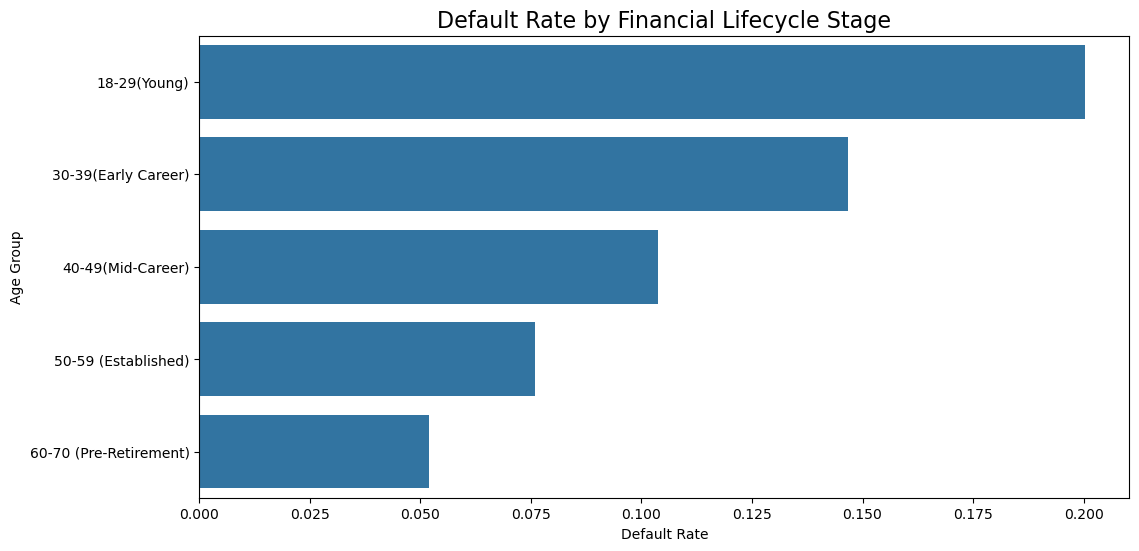

In [85]:
# --- Financial Lifecycle Analysis ---

# Create age bins
age_bins=[18,29,39,49,59,70]
age_labels=['18-29(Young)','30-39(Early Career)','40-49(Mid-Career)', 
              '50-59 (Established)','60-70 (Pre-Retirement)']
eda_df['Age_Group']=pd.cut(eda_df['Age'],bins=age_bins,labels=age_labels,right=False)

lifecycle_analysis=eda_df.groupby('Age_Group',observed=False).agg(
    DefaultRate=('Default','mean'),
    AvgIncome=('Income','mean'),
    AvgCreditLines=('NumCreditLines','mean'),
    AvgLoanAmount=('LoanAmount','mean')
).reset_index()

print("--- Financial Lifecycle Analysis ---")
print(lifecycle_analysis)

plt.figure(figsize=(12,6))
sns.barplot(data=lifecycle_analysis,x='DefaultRate',y='Age_Group')
plt.title('Default Rate by Financial Lifecycle Stage',fontsize=16)
plt.xlabel('Default Rate')
plt.ylabel('Age Group')
plt.show()

In [86]:
eda_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,DTIR_Cat,Income_Cat,IR_Cat,LA_Cat,Loan_to_Income_Ratio,DTI_per_Line,CS_scaled,DTIR_scaled,Financial_Health_Score,Age_Group
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0.4-0.5,75K-90K,15-20,50K-75K,0.5883,0.1100,0.4007,0.4250,-0.0243,50-59 (Established)
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0.6-0.7,45K-60K,<=5,100K-125K,2.4675,0.6793,0.2878,0.7250,-0.4372,60-70 (Pre-Retirement)
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,0.3-0.4,75K-90K,20-25,125K-150K,1.5342,0.1033,0.2750,0.2625,0.0125,40-49(Mid-Career)
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0.2-0.3,30K-45K,5-10,25K-50K,1.4126,0.0766,0.8069,0.1625,0.6444,30-39(Early Career)
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0.7-0.8,15K-30K,5-10,<=25K,0.4472,0.1825,0.6066,0.7875,-0.1809,60-70 (Pre-Retirement)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,...,0.8-0.9,30K-45K,10-15,200K-225K,5.5473,0.2124,0.4390,0.9375,-0.4985,18-29(Young)
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,...,0.2-0.3,45K-60K,10-15,175K-200K,3.6552,0.1049,0.3843,0.1375,0.2468,30-39(Early Career)
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,...,0.4-0.5,75K-90K,5-10,200K-225K,2.4557,0.1666,0.5410,0.5000,0.0410,50-59 (Established)
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,...,0.4-0.5,75K-90K,20-25,50K-75K,0.7117,0.4396,0.9271,0.4250,0.5021,40-49(Mid-Career)


#### Interest Rate Sensitivity Analysis

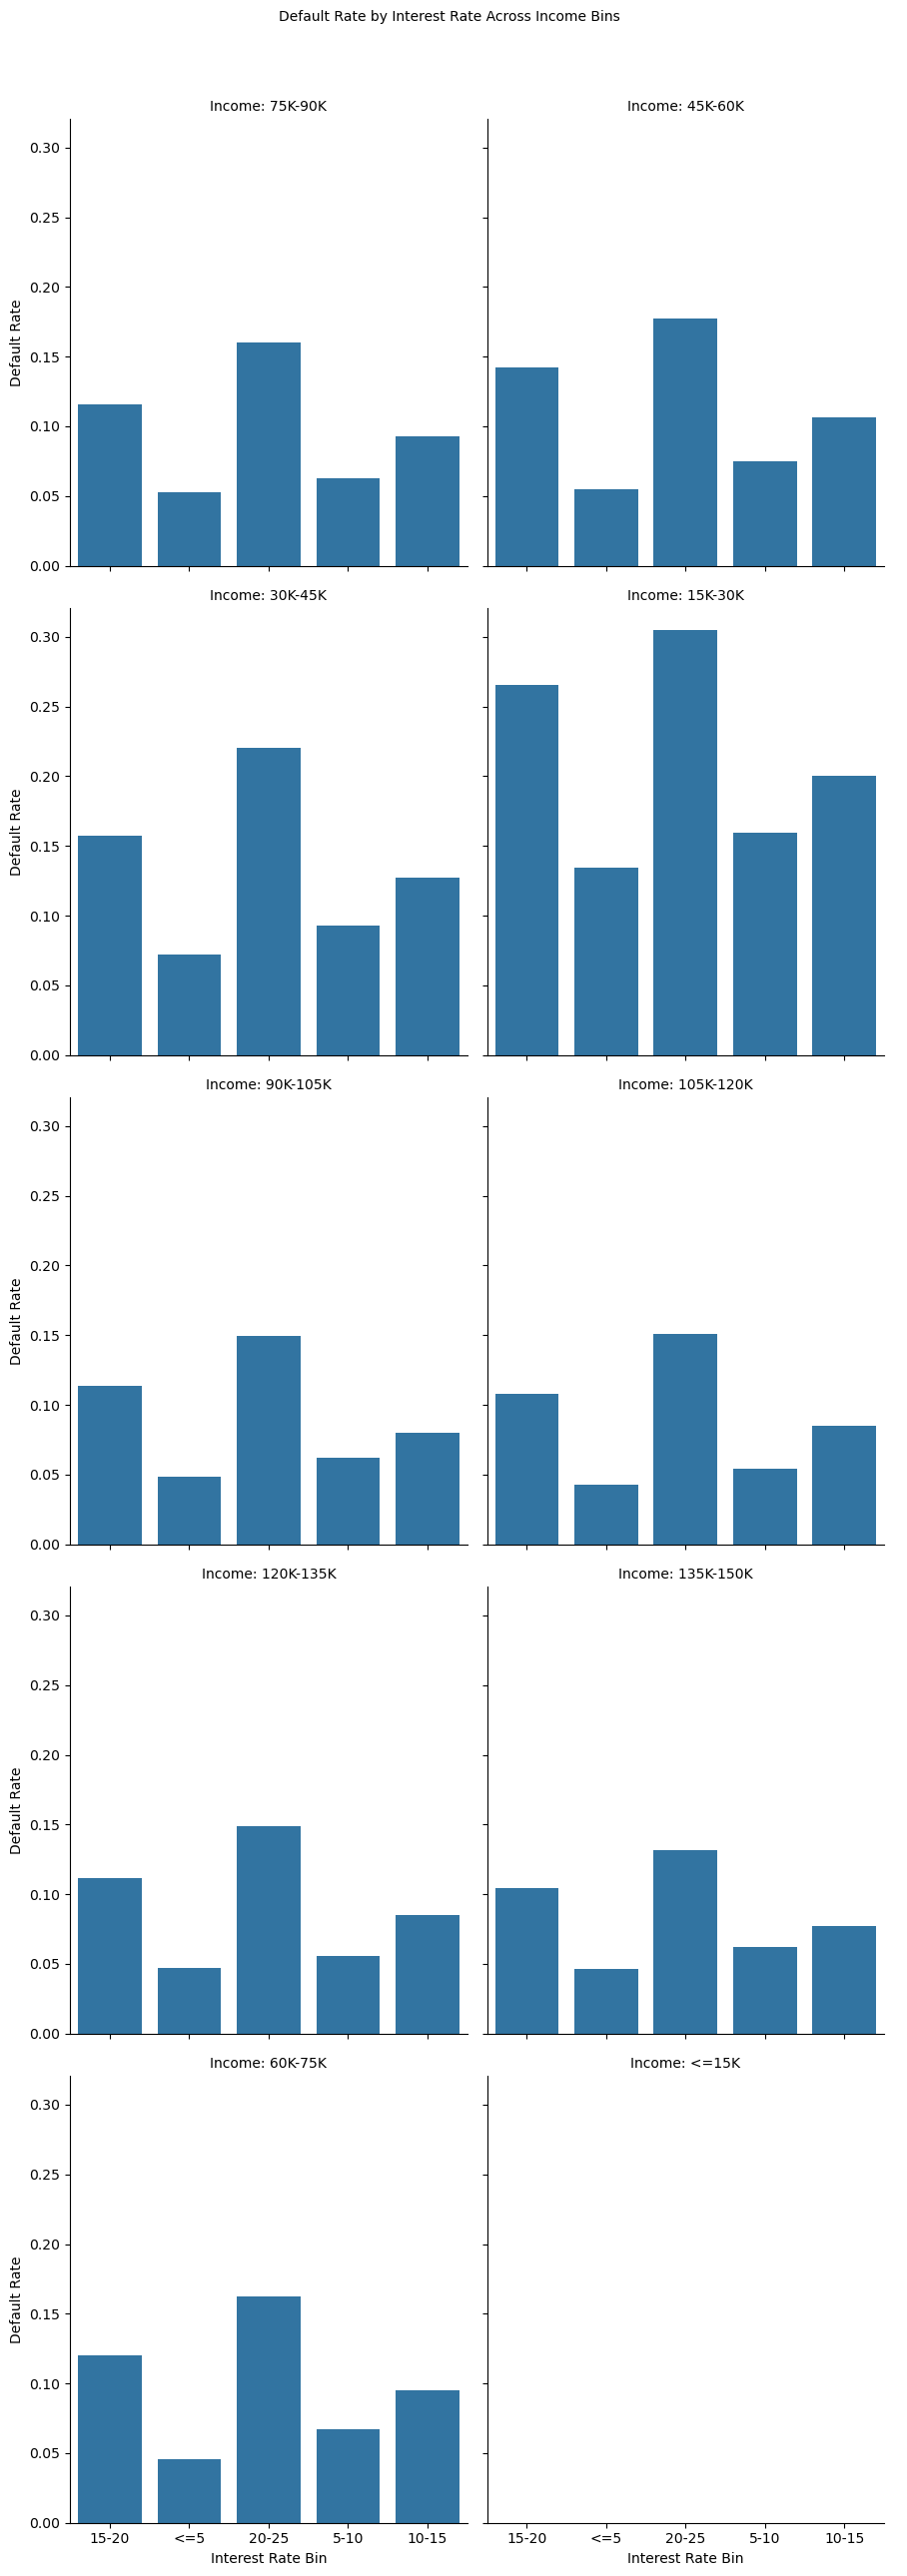

In [87]:
g = sns.catplot(x=eda_df['IR_Cat'],y='Default',col=eda_df['Income_Cat'],
                data=eda_df,kind='bar',height=5,aspect=0.9,
                col_wrap=2,errorbar=None)

g.fig.suptitle('Default Rate by Interest Rate Across Income Bins', y=1.03, fontsize=10)
g.set_axis_labels("Interest Rate Bin","Default Rate")
g.set_titles("Income: {col_name}")
plt.show()

#### Credit Experience Analysis

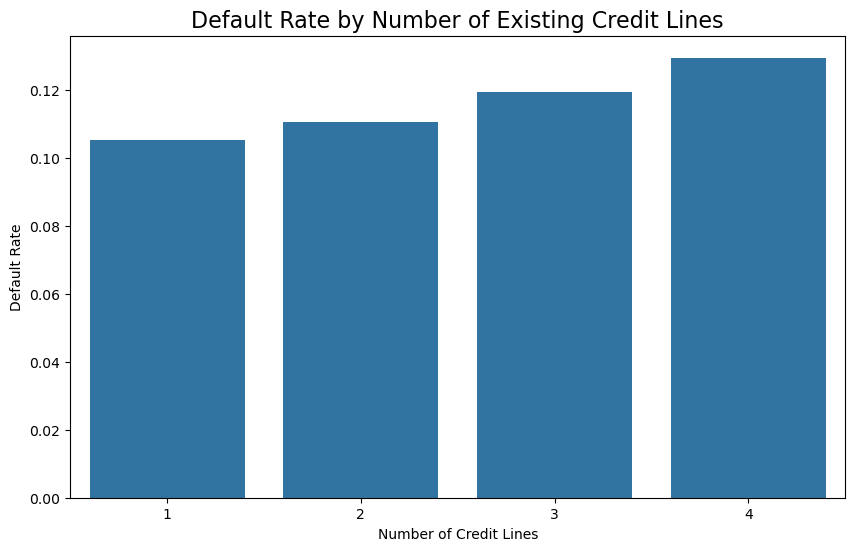

In [88]:
credit_line_risk=eda_df.groupby('NumCreditLines')['Default'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=credit_line_risk, x='NumCreditLines', y='Default')
plt.title('Default Rate by Number of Existing Credit Lines', fontsize=16)
plt.xlabel('Number of Credit Lines')
plt.ylabel('Default Rate')
plt.show()

#### Analysis of "Investment" vs. "Consumption" Loans

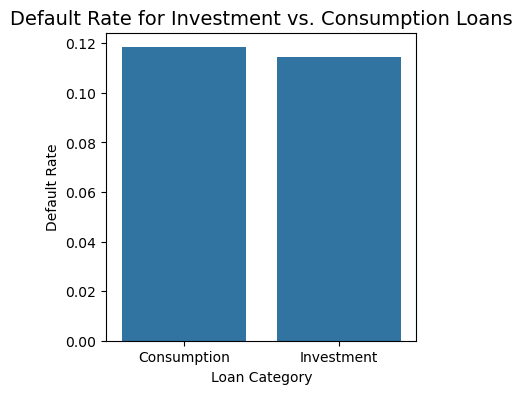

In [89]:
def categorize_purpose(purpose):
    if purpose in ['Home','Business','Education']:
        return 'Investment'
    else: 
        return 'Consumption'

eda_df['LoanCategory']=eda_df['LoanPurpose'].apply(categorize_purpose)

category_risk=eda_df.groupby('LoanCategory')['Default'].mean().sort_values(ascending=False)

plt.figure(figsize=(4,4))
sns.barplot(x=category_risk.index,y=category_risk.values)
plt.title('Default Rate for Investment vs. Consumption Loans', fontsize=14)
plt.xlabel('Loan Category')
plt.ylabel('Default Rate')
plt.show()

#### Demographic Stressor Analysis

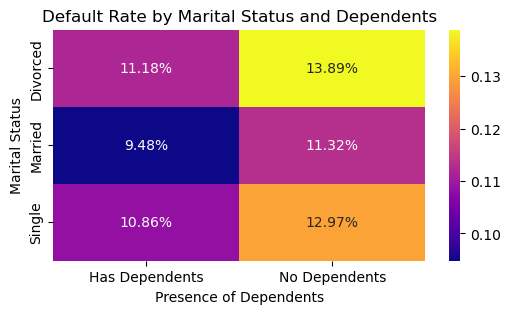

In [90]:
eda_df['Depend_Status']=eda_df['HasDependents'].apply(lambda x: 'Has Dependents' if x == 1 else 'No Dependents')

demographic_pivot=eda_df.pivot_table(values='Default', 
                                   index='MaritalStatus', 
                                   columns='Depend_Status', 
                                   aggfunc='mean')

plt.figure(figsize=(6,3))
sns.heatmap(demographic_pivot, annot=True, cmap="plasma", fmt=".2%")
plt.title('Default Rate by Marital Status and Dependents', fontsize=12)
plt.xlabel('Presence of Dependents')
plt.ylabel('Marital Status')
plt.show()

####  Pareto Analysis of Capital at Risk

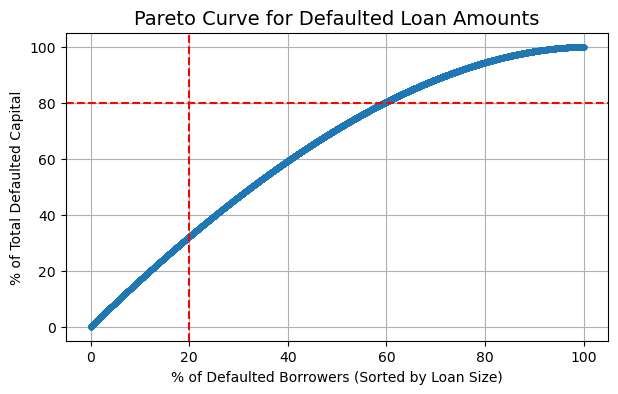

In [91]:
defaulted_df=eda_df[eda_df['Default']==1].copy()

defaulted_df=defaulted_df.sort_values(by='LoanAmount',ascending=False)

defaulted_df['CumulativeAmount']=defaulted_df['LoanAmount'].cumsum()
total_defaulted_amount=defaulted_df['LoanAmount'].sum()
defaulted_df['CumulativePercentage']= 100*defaulted_df['CumulativeAmount']/total_defaulted_amount

defaulted_df['BorrowerPercentage']=100*(np.arange(1,len(defaulted_df)+1)/len(defaulted_df))

# Plot the Pareto curve
plt.figure(figsize=(7, 4))
plt.plot(defaulted_df['BorrowerPercentage'],defaulted_df['CumulativePercentage'],marker='.')
plt.title('Pareto Curve for Defaulted Loan Amounts',fontsize=14)
plt.xlabel('% of Defaulted Borrowers (Sorted by Loan Size)')
plt.ylabel('% of Total Defaulted Capital')
plt.grid(True)
# Add 80/20 reference lines
plt.axhline(y=80, color='r', linestyle='--')
plt.axvline(x=20, color='r', linestyle='--')
plt.show()

#### Income Stability and Volatility Analysis

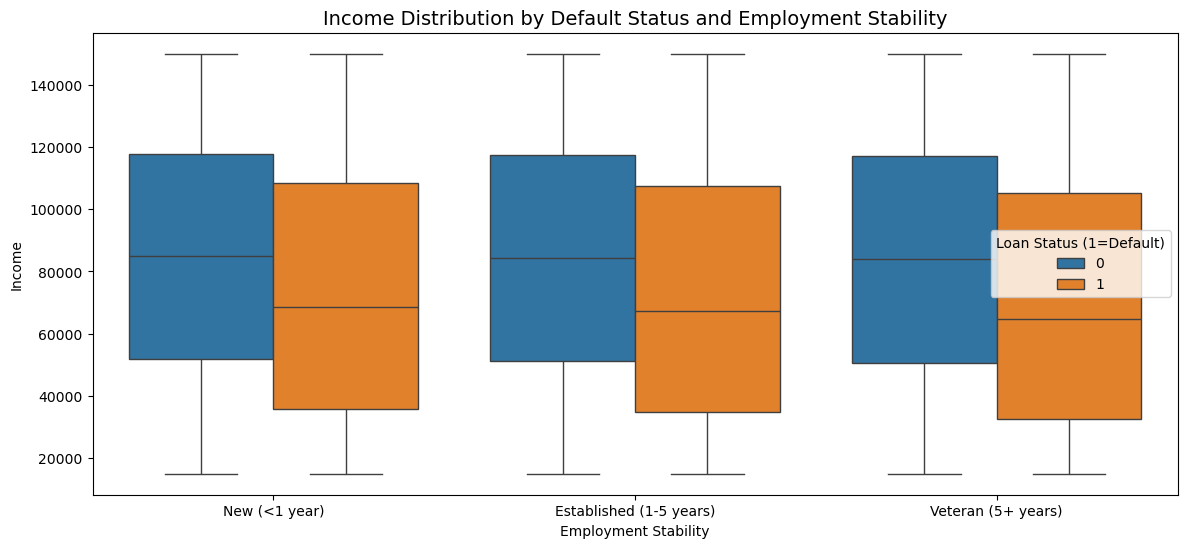

In [92]:
def stability_category(months):
    if months < 12:
        return 'New (<1 year)'
    elif months < 60:
        return 'Established (1-5 years)'
    else:
        return 'Veteran (5+ years)'

eda_df['Employment_Stability']=eda_df['MonthsEmployed'].apply(stability_category)

plt.figure(figsize=(14, 6))
sns.boxplot(data=eda_df, 
            x='Employment_Stability', 
            y='Income', 
            hue='Default',
            order=['New (<1 year)', 'Established (1-5 years)', 'Veteran (5+ years)'])
plt.title('Income Distribution by Default Status and Employment Stability', fontsize=14)
plt.xlabel('Employment Stability')
plt.ylabel('Income')
plt.legend(title='Loan Status (1=Default)')
plt.show()

#### "Risk Taker" Profile Analysis

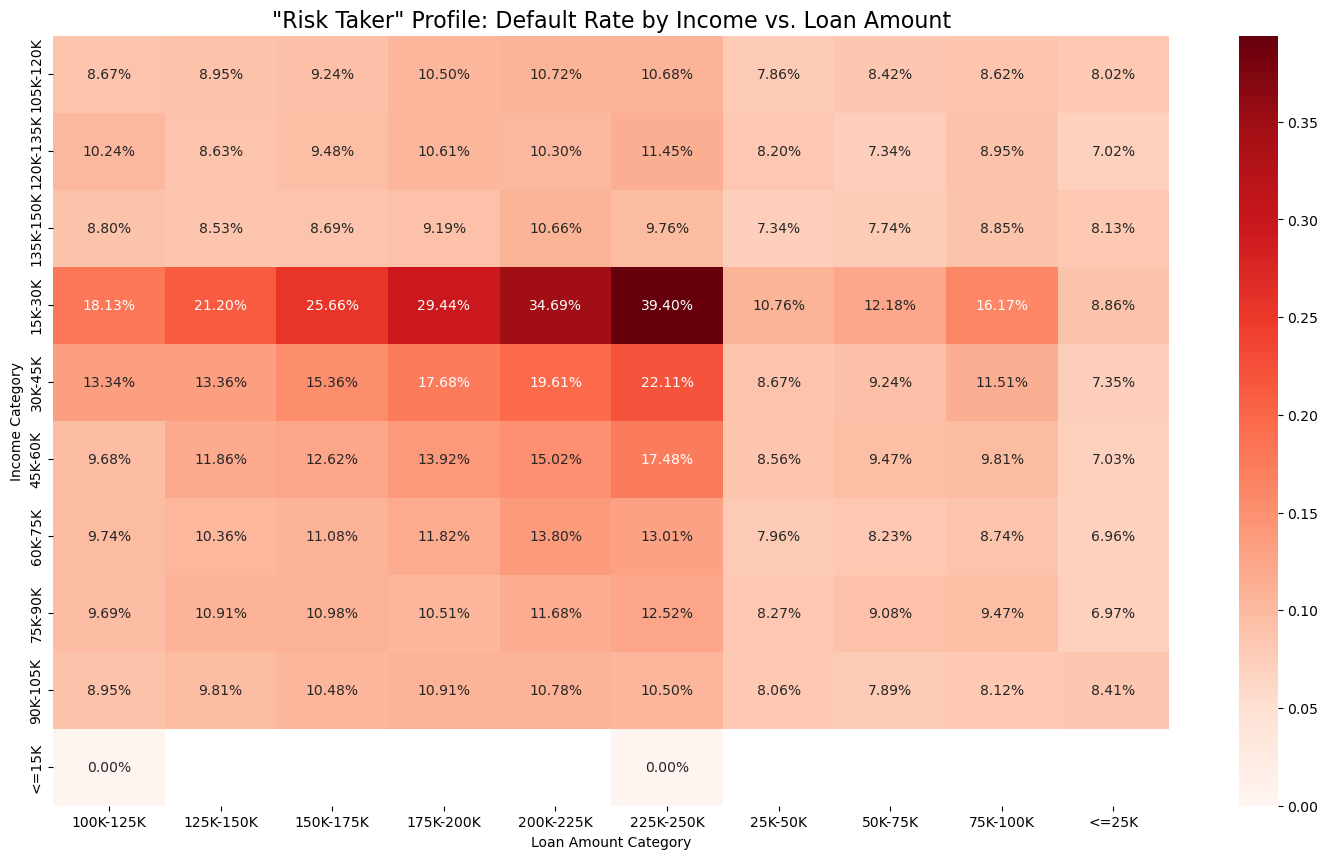

In [93]:
risk_profile_pivot=eda_df.pivot_table(values='Default', 
                                    index='Income_Cat', 
                                    columns='LA_Cat', 
                                    aggfunc='mean')

plt.figure(figsize=(18,10))
sns.heatmap(risk_profile_pivot,annot=True,cmap="Reds",fmt=".2%")
plt.title('"Risk Taker" Profile: Default Rate by Income vs. Loan Amount', fontsize=16)
plt.xlabel('Loan Amount Category')
plt.ylabel('Income Category')
plt.show()

#### Model Development

In [94]:
eda_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,LA_Cat,Loan_to_Income_Ratio,DTI_per_Line,CS_scaled,DTIR_scaled,Financial_Health_Score,Age_Group,LoanCategory,Depend_Status,Employment_Stability
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,50K-75K,0.5883,0.1100,0.4007,0.4250,-0.0243,50-59 (Established),Consumption,Has Dependents,Veteran (5+ years)
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,100K-125K,2.4675,0.6793,0.2878,0.7250,-0.4372,60-70 (Pre-Retirement),Consumption,No Dependents,Established (1-5 years)
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,125K-150K,1.5342,0.1033,0.2750,0.2625,0.0125,40-49(Mid-Career),Consumption,Has Dependents,Established (1-5 years)
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,25K-50K,1.4126,0.0766,0.8069,0.1625,0.6444,30-39(Early Career),Investment,No Dependents,New (<1 year)
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,<=25K,0.4472,0.1825,0.6066,0.7875,-0.1809,60-70 (Pre-Retirement),Consumption,Has Dependents,New (<1 year)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,...,200K-225K,5.5473,0.2124,0.4390,0.9375,-0.4985,18-29(Young),Consumption,No Dependents,Veteran (5+ years)
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,...,175K-200K,3.6552,0.1049,0.3843,0.1375,0.2468,30-39(Early Career),Investment,No Dependents,Established (1-5 years)
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,...,200K-225K,2.4557,0.1666,0.5410,0.5000,0.0410,50-59 (Established),Consumption,Has Dependents,Veteran (5+ years)
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,...,50K-75K,0.7117,0.4396,0.9271,0.4250,0.5021,40-49(Mid-Career),Consumption,Has Dependents,Established (1-5 years)


In [95]:
eda_df.to_csv('final_data.csv',index=False)